# Post-treatment - Model selection
# ABC-SMC

In [1]:
using CSV, DataFrames, Statistics, Plots, StatsPlots

In [2]:
scenarios = ["H=0 ; C=0", "H=1 ; C=0", "H=0 ; C=1", "H=1 ; C=1"];

# Configuration - ABC-SMC Sampler

In [3]:
id_config = ""

""

In [4]:
dir = "../../ABC_SMC/results$id_config/"

"../../ABC_SMC/results/"

In [5]:
nb_iter = 17;
tolerance = [250, 200, 150, 100, 80, 70, 60, 50, 40, 30, 25, 23, 20, 18, 16, 15, 14]

N = 2000;

# Load results

In [6]:
mat_proba = zeros(nb_iter+1, 4);
mat_distances = zeros(N, nb_iter+1);

In [7]:
for iter in 1:nb_iter+1
    df = CSV.read(string(dir, "step_",iter-1,".csv"), DataFrame) 
    mat_proba[iter, 1] = sum(df[(df[:,:C].==0) .* (df[:,:H].==0),:weights])
    mat_proba[iter, 2] = sum(df[(df[:,:C].==0) .* (df[:,:H].==1),:weights])
    mat_proba[iter, 3] = sum(df[(df[:,:C].==1) .* (df[:,:H].==0),:weights])
    mat_proba[iter, 4] = sum(df[(df[:,:C].==1) .* (df[:,:H].==1),:weights])

    mat_distances[:,iter] = df[:,:dist_L2]
    
end

In [8]:
hcat(scenarios,mat_proba[end,:])

4×2 Matrix{Any}:
 "H=0 ; C=0"  0.0
 "H=1 ; C=0"  0.273078
 "H=0 ; C=1"  0.0
 "H=1 ; C=1"  0.726922

# Create and Save plots

In [9]:
for i in 1:nb_iter+1
    iter = i - 1
    # Création du bar plot
    bar(scenarios, mat_proba[i,:], legend=false, ylims=(0,1), dpi=300)
    
    # Ajout de titres et étiquettes
    xlabel!("Scenarios")
    ylabel!("Marginal posterior probability")
    title!("Iteration = $iter")
    
    savefig("fig$id_config/marginal_posterior_SMC_iter$iter")
end

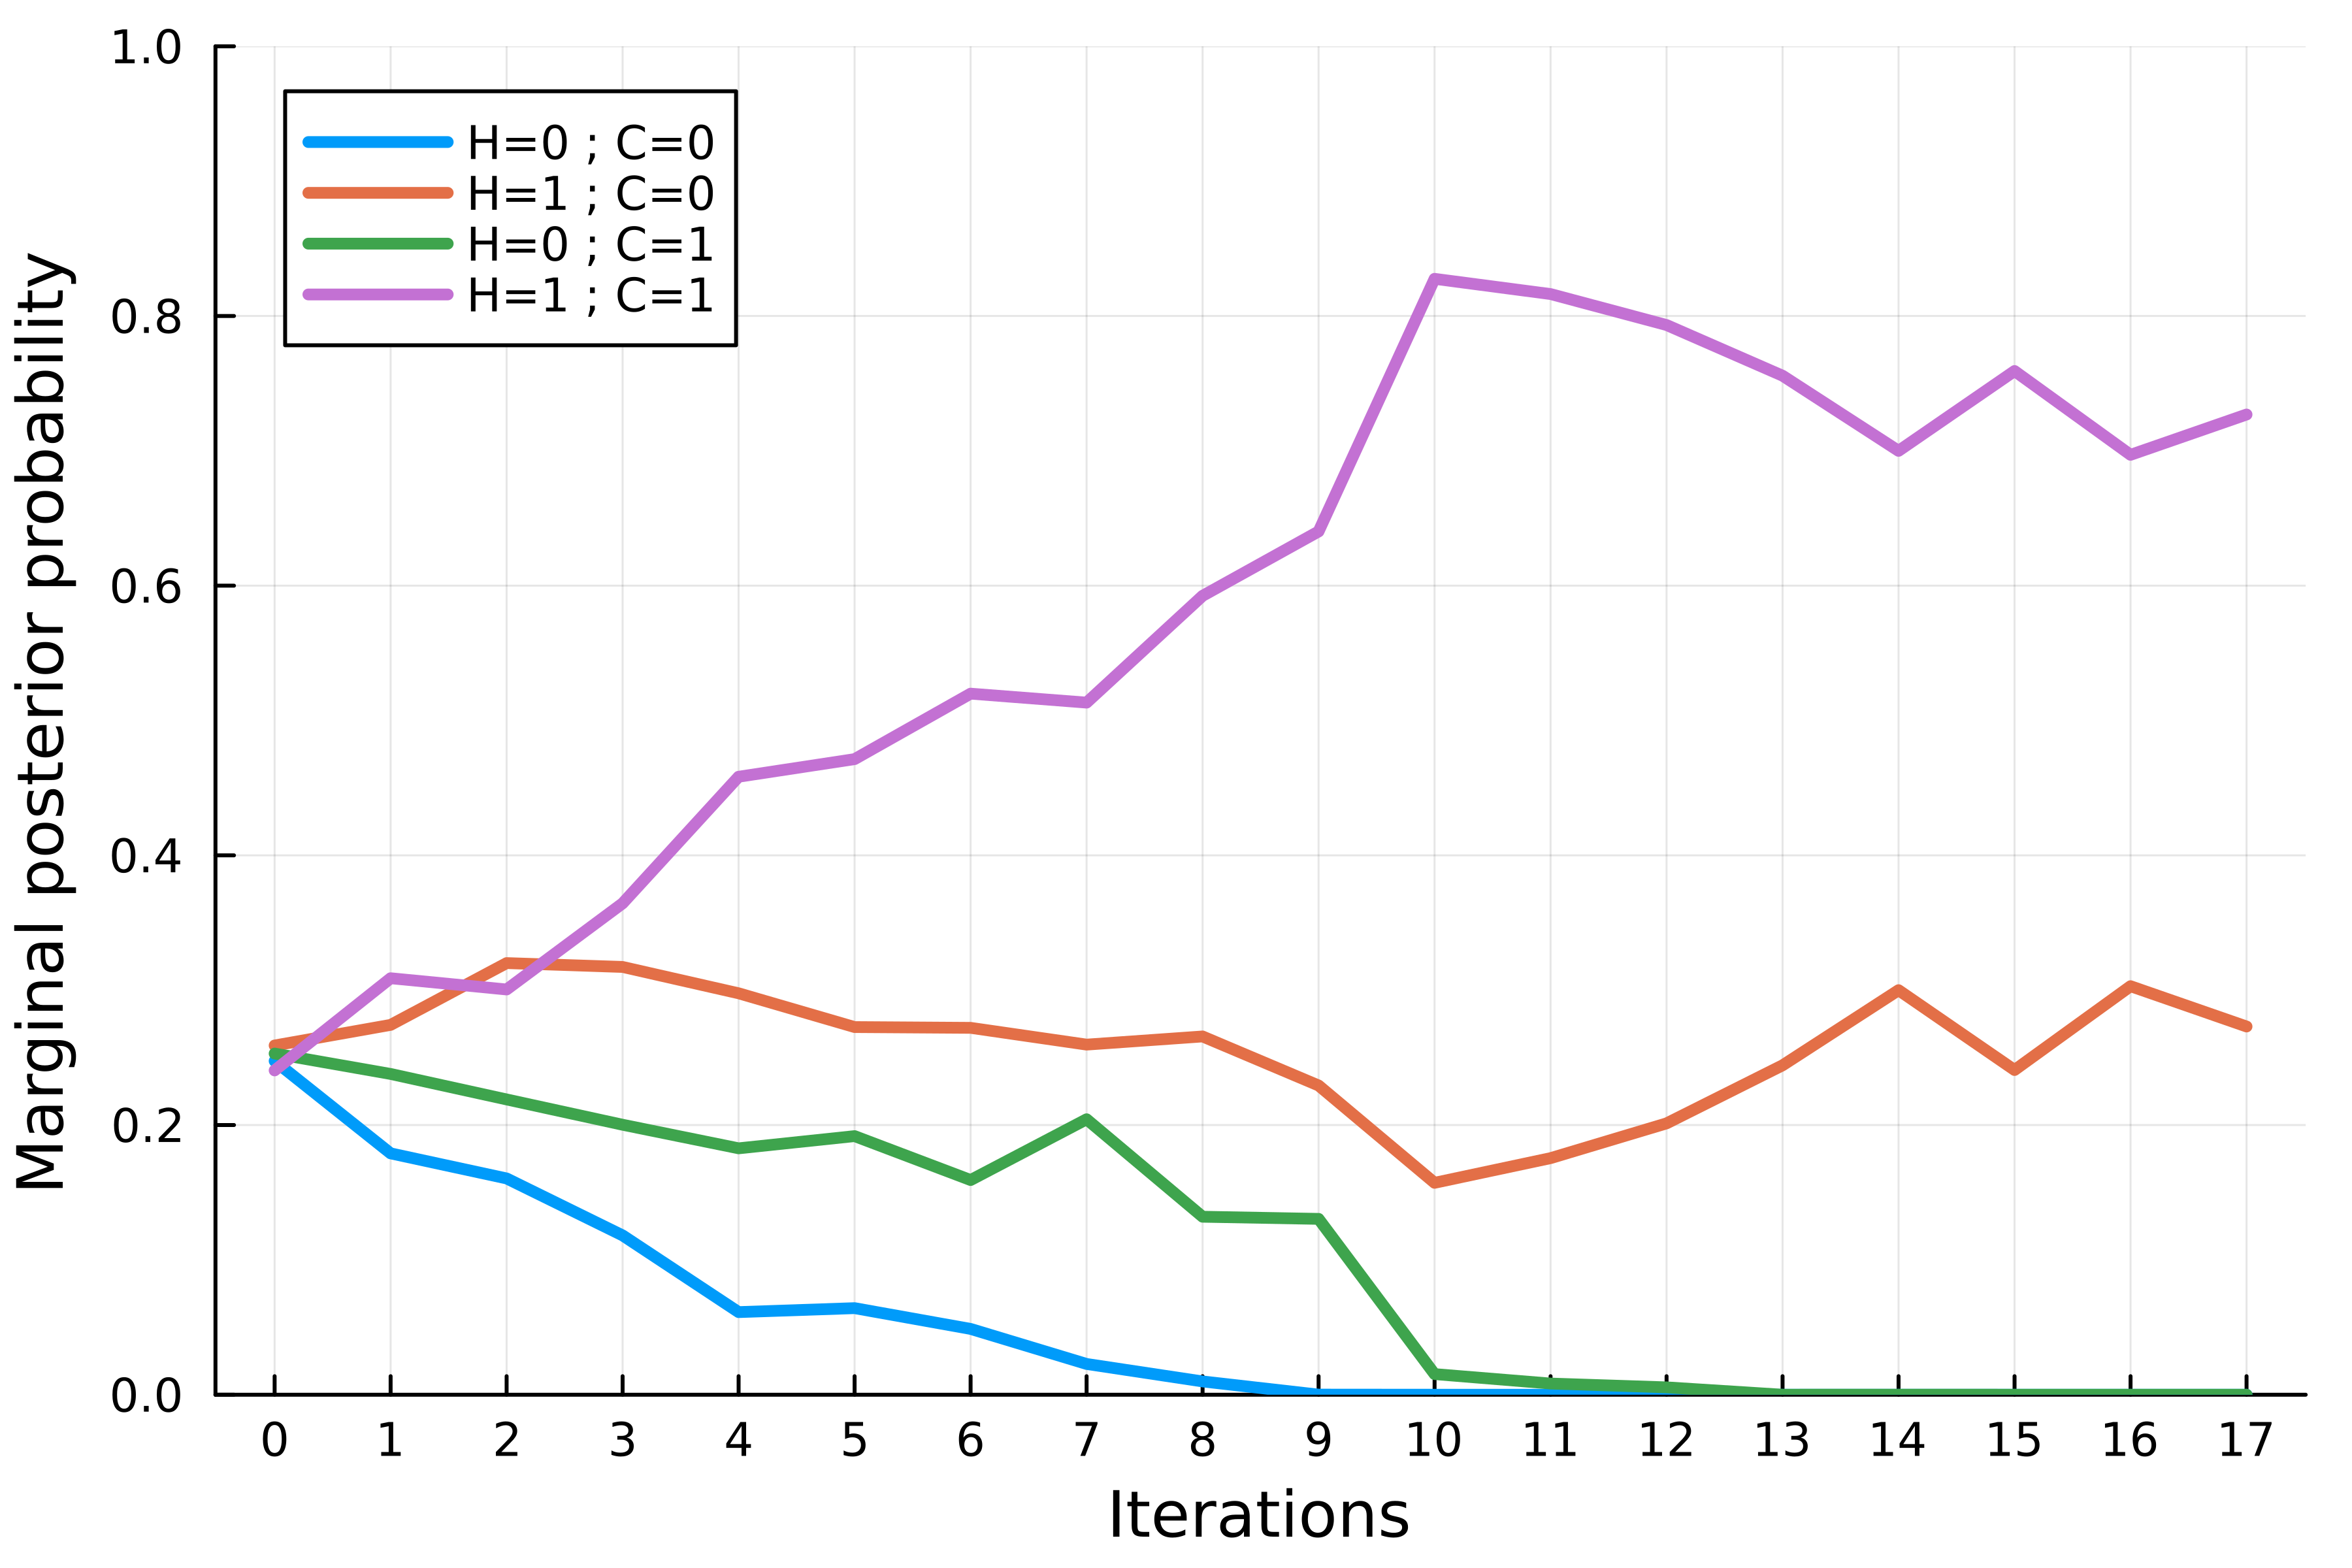

In [10]:
plot(dpi=600)
for m in 1:4
    plot!(mat_proba[:,m], ylims=(0,1), linewidth=3, label=scenarios[m])
end
plot!(xlabel="Iterations", xticks=(collect(1:nb_iter+1), collect(0:nb_iter)), ylabel="Marginal posterior probability")
savefig("fig$id_config/evol_proba_models_SMC")
plot!()

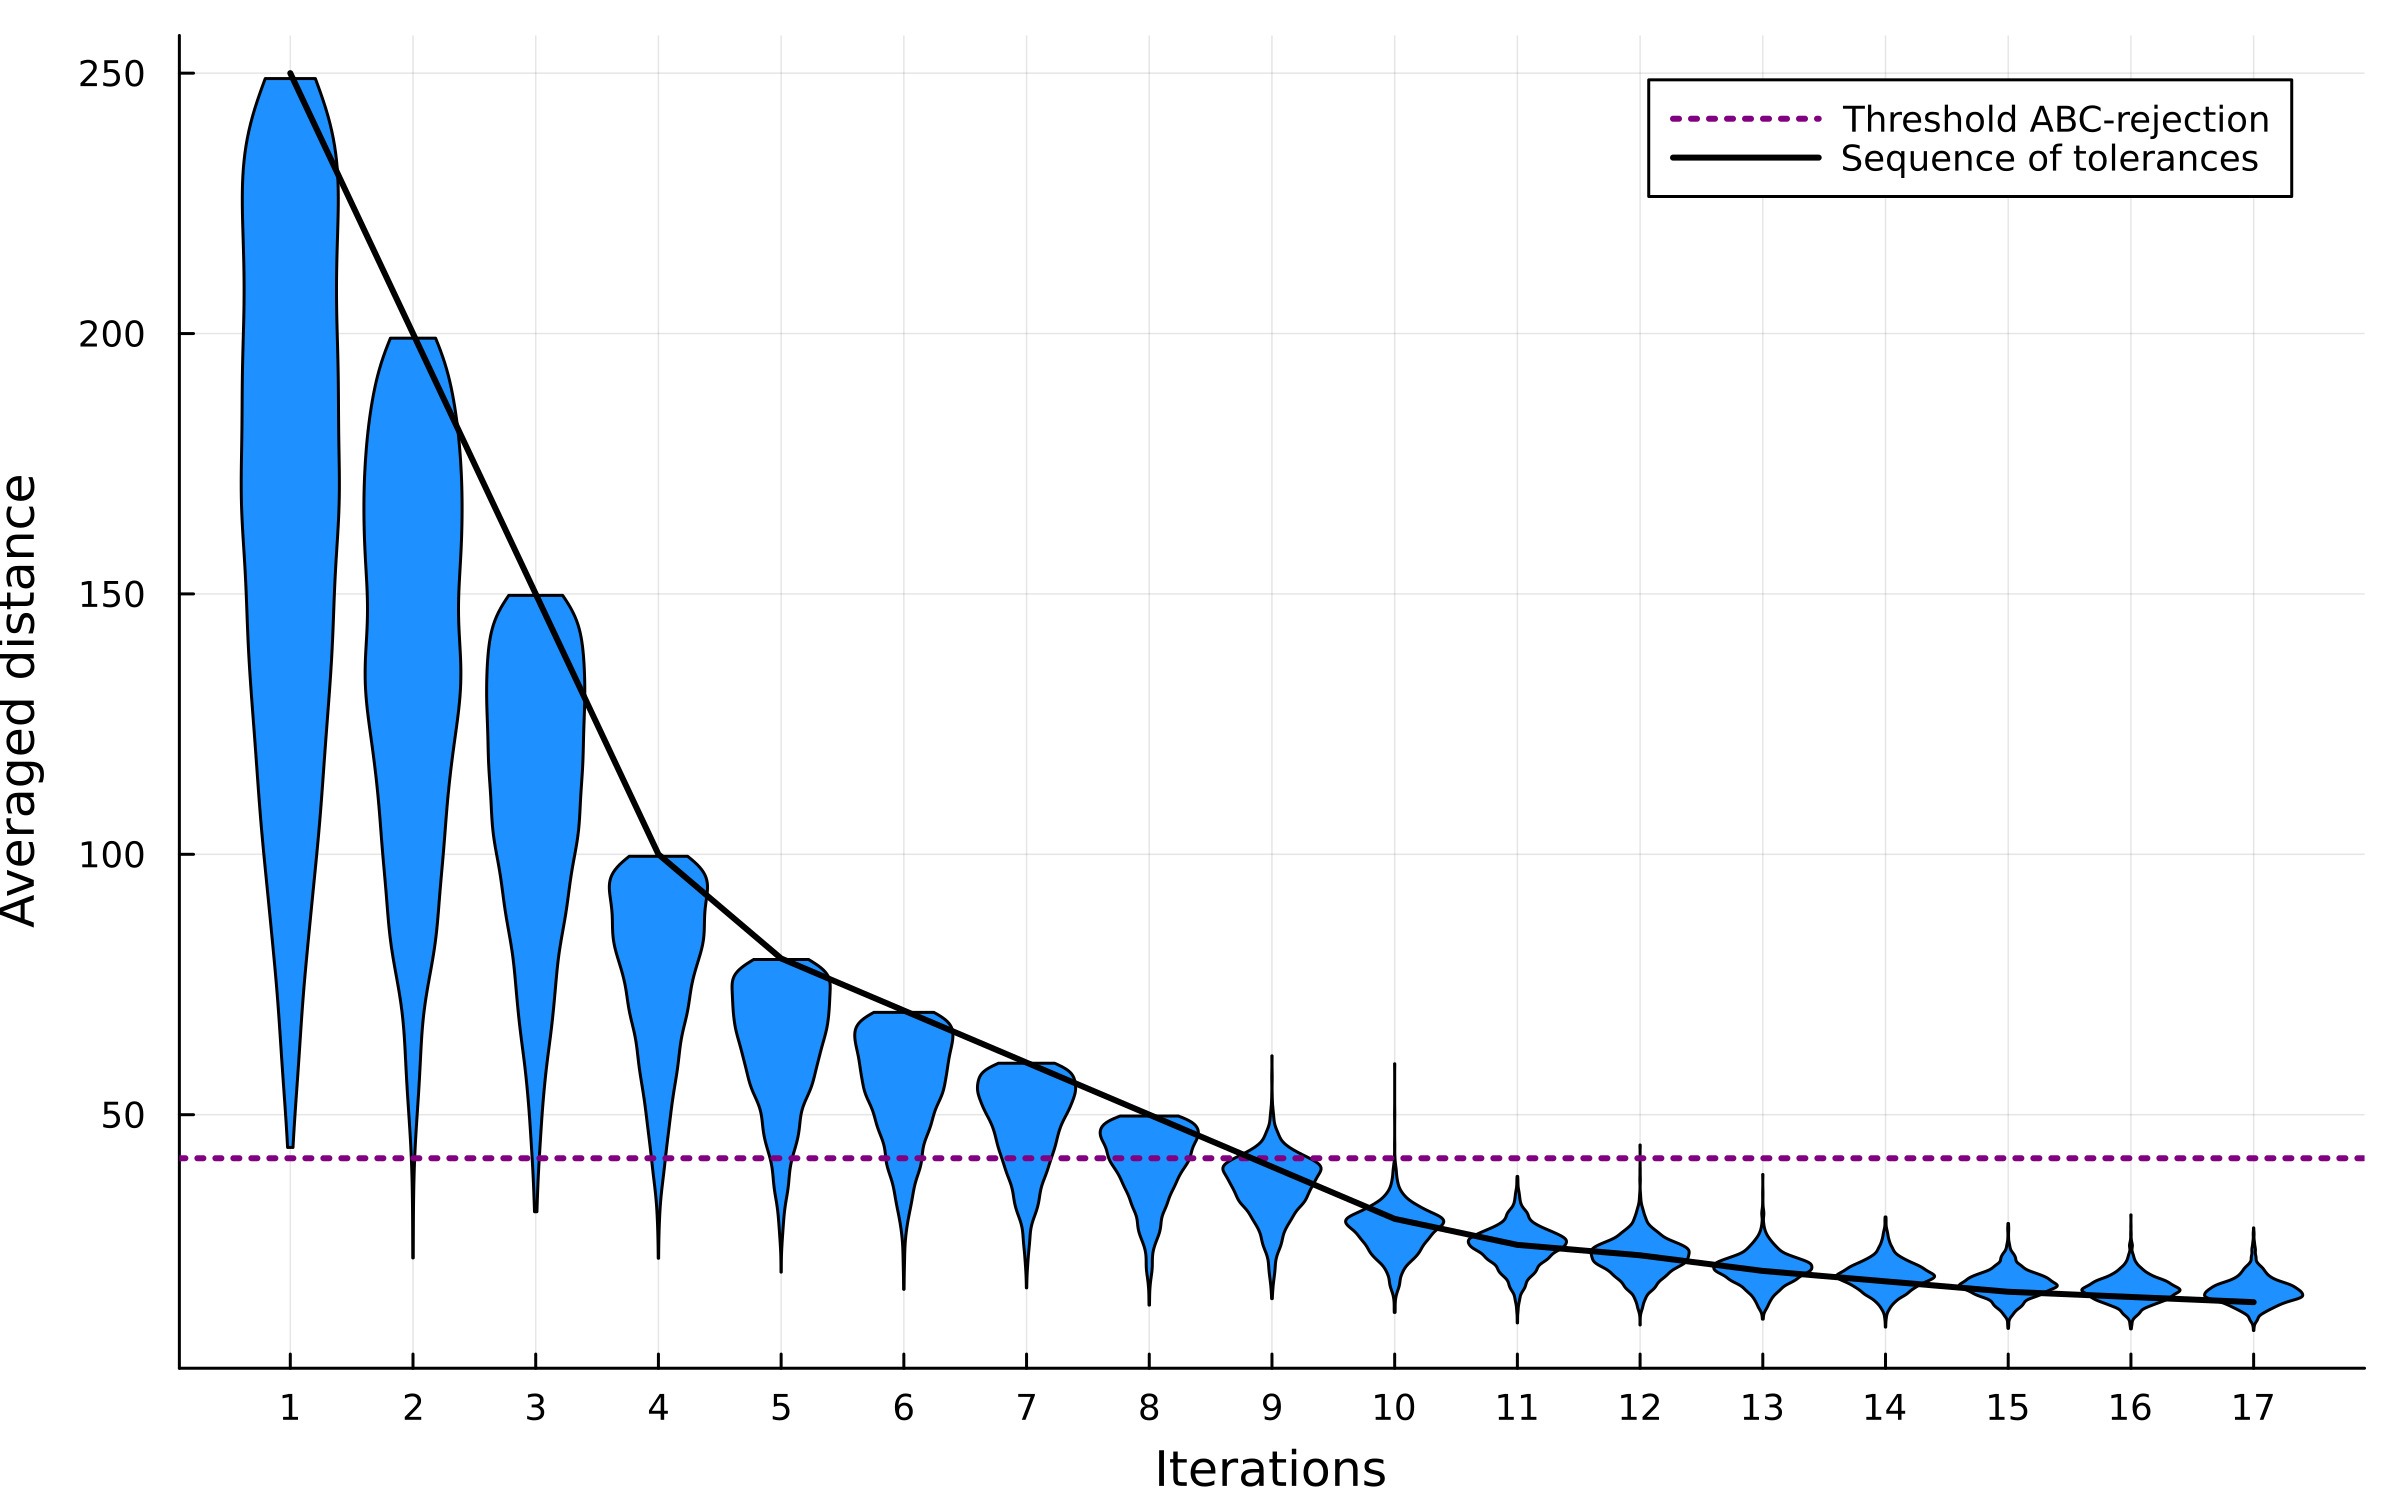

In [11]:
plot(dpi=300, size=(800,500))
for i in 2:nb_iter+1
    violin!(mat_distances[:,i], label="", color=:dodgerblue)
end
hline!([41.64], label="Threshold ABC-rejection", color=:purple, linewidth=2, linestyle=:dot)
plot!(tolerance[1:nb_iter], linewidth=2, color=:black, label="Sequence of tolerances")
plot!(xlabel="Iterations", xticks=collect(1:nb_iter), ylabel="Averaged distance")
savefig("fig$id_config/evol_distance_SMC")
plot!()

# Different configurations

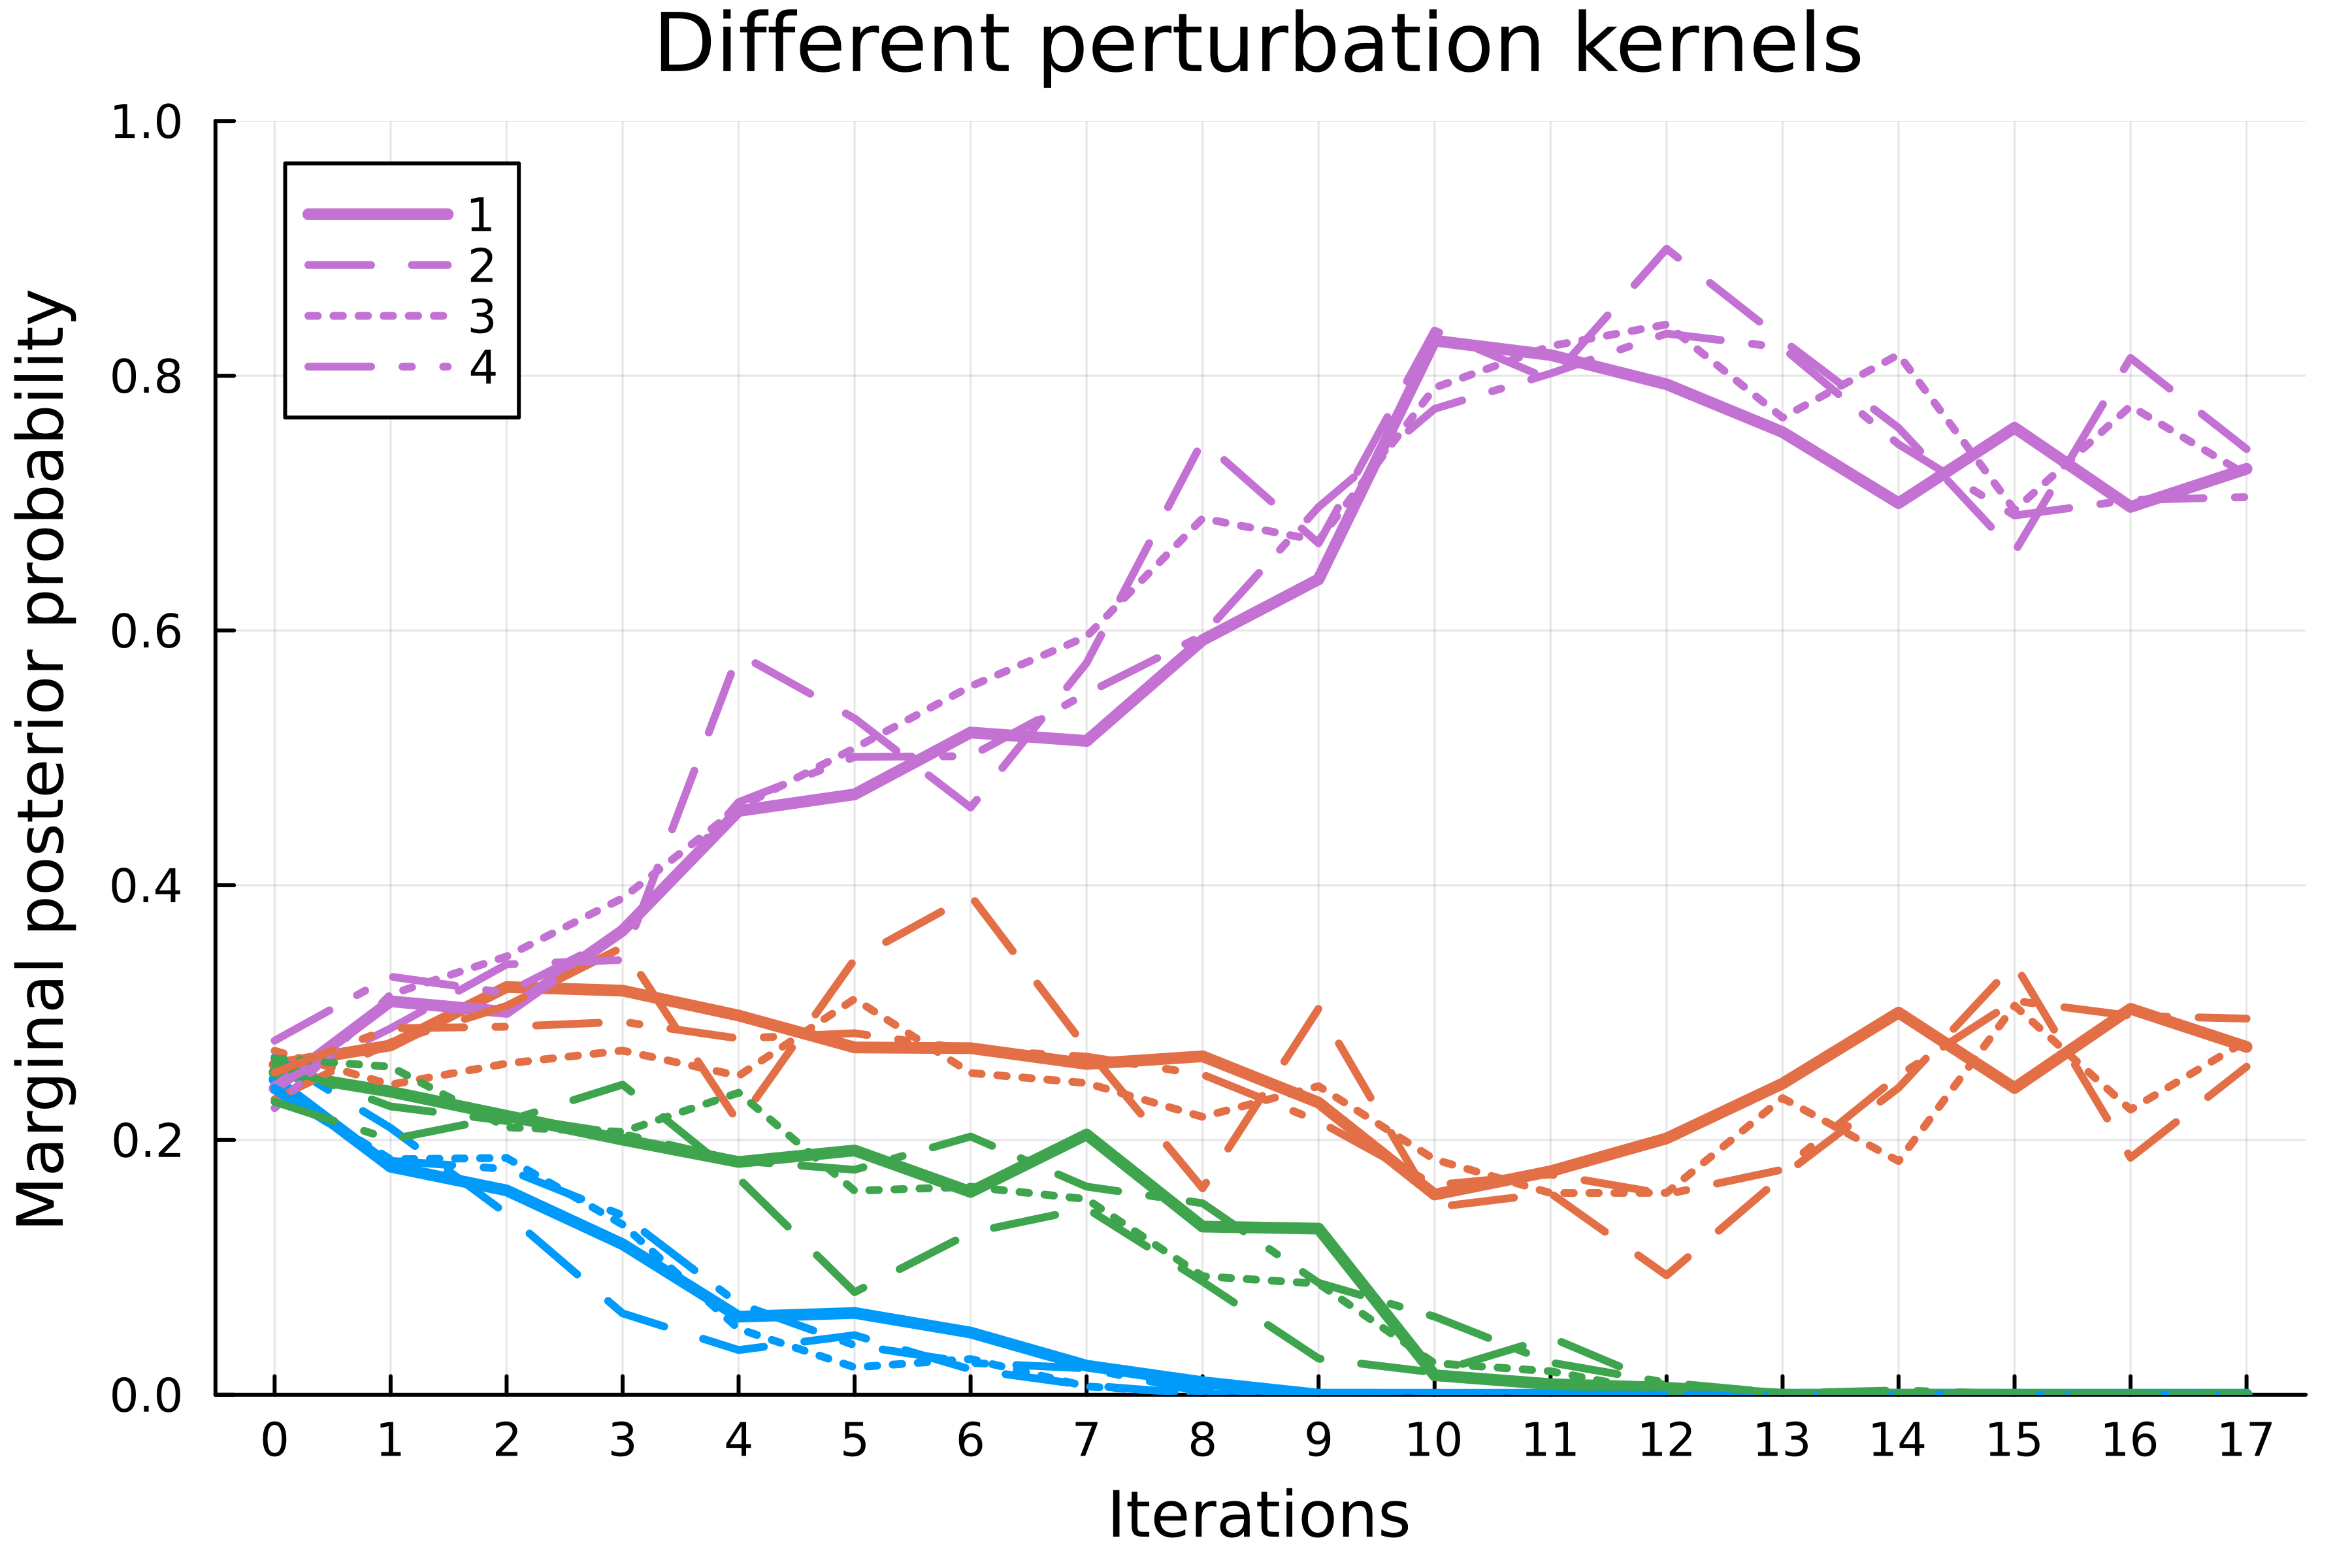

In [12]:
plot(dpi=600)


for m in 1:4
    plot!(mat_proba[:,m], ylims=(0,1), linewidth=3, label = m == 4 ? 1 : "", color=m)
end


for id_config in 2:4
    dir = "../../ABC_SMC/results$id_config/"
    mat_proba_i = zeros(nb_iter+1, 4);
    for iter in 1:nb_iter+1
        df = CSV.read(string(dir, "step_",iter-1,".csv"), DataFrame) 
        mat_proba_i[iter, 1] = sum(df[(df[:,:C].==0) .* (df[:,:H].==0),:weights])
        mat_proba_i[iter, 2] = sum(df[(df[:,:C].==0) .* (df[:,:H].==1),:weights])
        mat_proba_i[iter, 3] = sum(df[(df[:,:C].==1) .* (df[:,:H].==0),:weights])
        mat_proba_i[iter, 4] = sum(df[(df[:,:C].==1) .* (df[:,:H].==1),:weights])
            
    end
    for m in 1:4
        plot!(mat_proba_i[:,m], ylims=(0,1), linewidth=2, 
                label = m == 4 ? id_config : "",
                linestyle=[:solid, :dash, :dot, :dashdot][id_config],
                color=m)
    end
end
plot!(xlabel="Iterations", xticks=(collect(1:nb_iter+1), collect(0:nb_iter)), 
        ylabel="Marginal posterior probability",
        title="Different perturbation kernels")
savefig("fig/robustness_kernel")
plot!()


